# 5) Build a Deep Neural Network for multi class text classification using Reuters dataset


In [1]:
# Importing dataset
from tensorflow.keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
# Let's take a look at shapes of datasets.
print(f"Shape of train data: {train_data.shape}")
print(f"Shape of test data: {test_data.shape}")

Shape of train data: (8982,)
Shape of test data: (2246,)


In [3]:
# Each example is a list of integers
print(f"First example: {train_data[0]}")

First example: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# Let's see the label of first example.
print(f"The label of first example: {train_labels[0]}")

The label of first example: 3


In [5]:
# Preparing the Data
# Creating a function to turn data into multi-hot encode.

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Creating an all-zero matrix of shape
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            # Seting specific indices of results[i] to 1s
            results[i, j] = 1. 
    return results

In [6]:
# Building the Model
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [7]:
# Vectorized traning data and test data:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 
print(f"First row : {x_train[0]}")


First row : [0. 1. 1. ... 0. 0. 0.]


In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(f"First label: {y_train[0]}")

First label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# Compiling the Model 
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
#Creating Validation Dataset 
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [11]:
# Training the Model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 58ms/step - loss: 2.6851 - accuracy: 0.5279 - val_loss: 1.7855 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.4642 - accuracy: 0.7026 - val_loss: 1.3277 - val_accuracy: 0.7250
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0716 - accuracy: 0.7777 - val_loss: 1.1276 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8367 - accuracy: 0.8226 - val_loss: 1.0244 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6648 - accuracy: 0.8569 - val_loss: 0.9598 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5343 - accuracy: 0.8881 - val_loss: 0.9356 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4312 - accuracy: 0.9098 - val_loss: 0.9131 - val_accuracy: 0.8080
Epoch 8/20
16

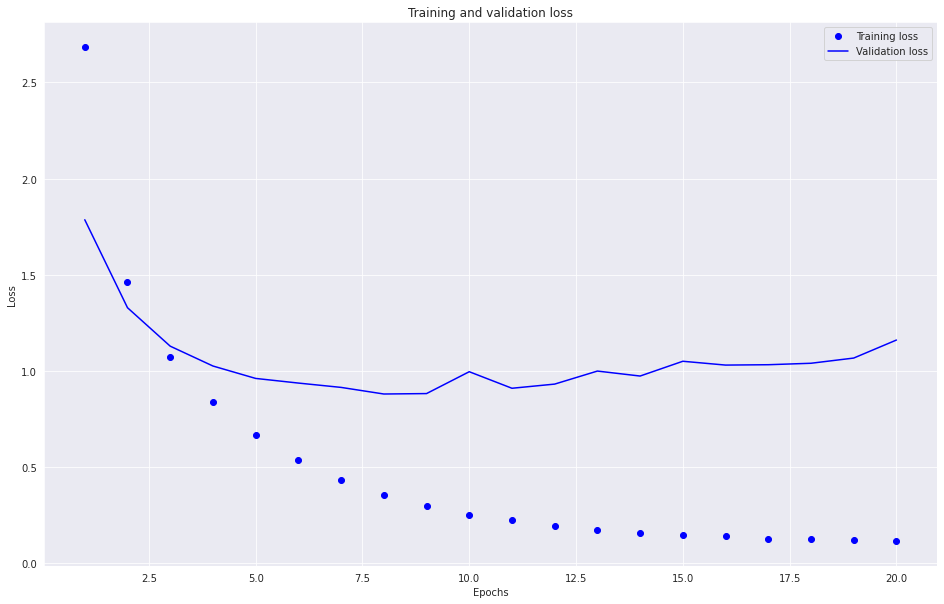

In [12]:
# Plotting the Training and Validation Loss 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize = (16, 10))
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

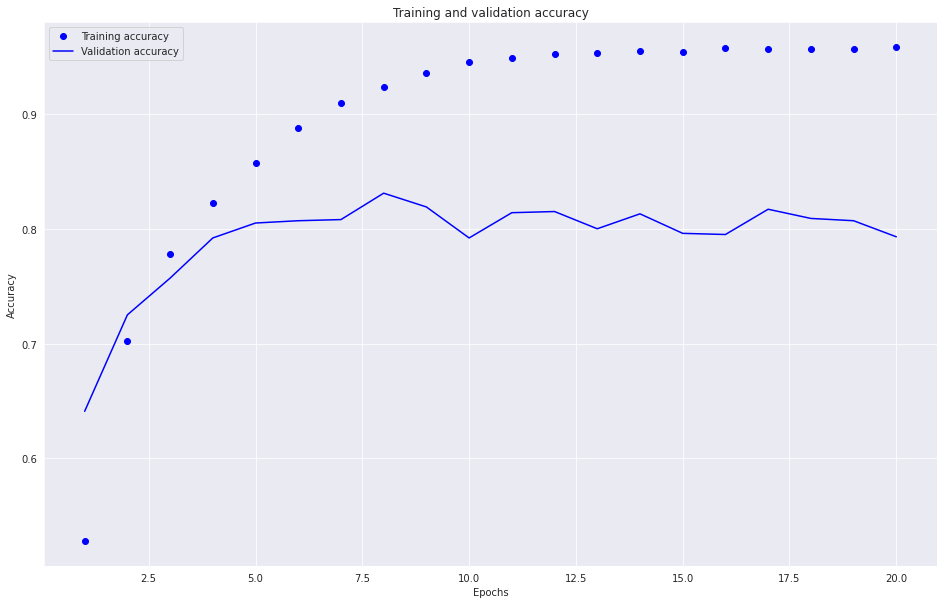

In [13]:
# Plotting the Training and Validation Accuracy 
plt.clf()    
plt.figure(figsize = (16, 10))
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()